In [662]:
%matplotlib inline
import cv2  
import os
from matplotlib import pyplot as plt
import numpy as np

In [663]:
def display_img_plt(img):
    # load image using cv2....and do processing.
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # as opencv loads in BGR format by default, we want to show it in RGB.

    plt.xticks([]), plt.yticks([])
    plt.show()

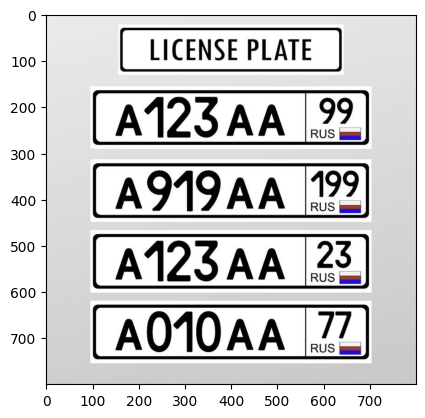

In [664]:
rus_plate_path = 'rus_plate.jpg'
rus_plate_img = cv2.imread(rus_plate_path)


rus_plate_img_cropped = rus_plate_img[0:800,:]

plt.imshow(rus_plate_img_cropped)
plt.show()
# print (f"image shape: {rus_plate_img.shape}")

# display_img_plt(rus_plate_img)


In [665]:
plates_cascade = cv2.CascadeClassifier()

In [666]:
if not plates_cascade.load(cv2.samples.findFile('haarcascade_russian_plate_number.xml')):
    print('--(!)Error loading plates cascade')
    exit(0)


In [667]:
# Optimized for people3.jpg
def detectAndDisplay2(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect plates
    plates = plates_cascade.detectMultiScale(frame_gray, scaleFactor = 1.1, minNeighbors = 3, minSize = (50, 150)) #maxSize = (1000, 1000))
    
    
    print (plates)
    print (f"{len (plates)} plates are detected")
    
    
    for (x,y,w,h) in plates:
        center = (x + w//2, y + h//2)
        frame = cv2.rectangle(frame, (x,y+40), (x+w,y+180), (255, 0, 255), 4)
    display_img_plt(frame)

[[104 426 614 205]
 [ 89 110 637 212]
 [101 577 616 205]
 [ 94 265 631 210]]
4 plates are detected


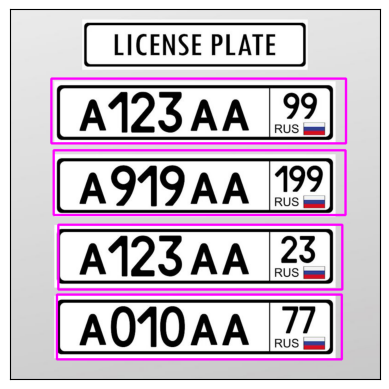

In [668]:
detectAndDisplay2(rus_plate_img_cropped)

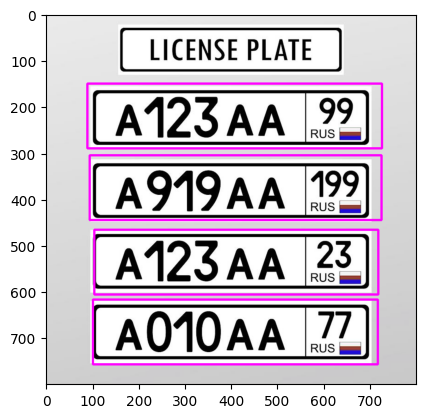

In [669]:
plt.imshow(rus_plate_img_cropped)
plt.show()

In [670]:
cv2.imwrite('rus_plate_detection.jpg', rus_plate_img_cropped)

True